In [58]:
import pickle
import torch
from pytorch_lightning import Trainer
from pathlib import Path
from pandas import DataFrame
from caveat import models
from caveat.data import build_conditional_dataloader

import utils

In [67]:
ckpt_path = Path(
    "C:/Users/fred/Projects/caveat/logs/gen-demo/5x128/version_0/checkpoints/epoch=33-step=25976.ckpt"
)

In [68]:
# load model from checkpoint
model = models.sequence.cond_gen_lstm.CVAE_LSTM.load_from_checkpoint(ckpt_path)

# load encoders
path = ckpt_path.parent.parent / "schedule_encoder.pkl"
with open(path, "rb") as f:
    schedule_encoder = pickle.load(f)

path = ckpt_path.parent.parent / "attribute_encoder.pkl"
with open(path, "rb") as f:
    attributes_encoder = pickle.load(f)


# util function
def generate(synthetics):
    synthetic_conditionals = attributes_encoder.encode(synthetics)

    dataloader = build_conditional_dataloader(
        synthetic_conditionals, 6, max(len(synthetic_conditionals), 256)
    )

    trainer = Trainer()
    predictions = trainer.predict(
        model=model, ckpt_path=ckpt_path, dataloaders=dataloader
    )

    schedules = schedule_encoder.decode(torch.concat(predictions))
    print(f"generated {schedules.pid.nunique()} schedules")
    return schedules

Using teacher forcing ratio: 0.5
Using KLD weight: 0.001
Using duration weight: 1.0
Using mask: True
Using weighted loss: True


In [69]:
attributes_encoder.config

{'gender': {'nominal': {'F': 0, 'M': 1}},
 'age': {'ordinal': [0, 100]},
 'income': {'ordinal': [0, 5]},
 'area': {'nominal': {'rural': 0, 'suburban': 1, 'urban': 2}}}

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at C:\Users\fred\Projects\caveat\logs\gen-demo\5x128\version_0\checkpoints\epoch=33-step=25976.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at C:\Users\fred\Projects\caveat\logs\gen-demo\5x128\version_0\checkpoints\epoch=33-step=25976.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

generated 5 schedules


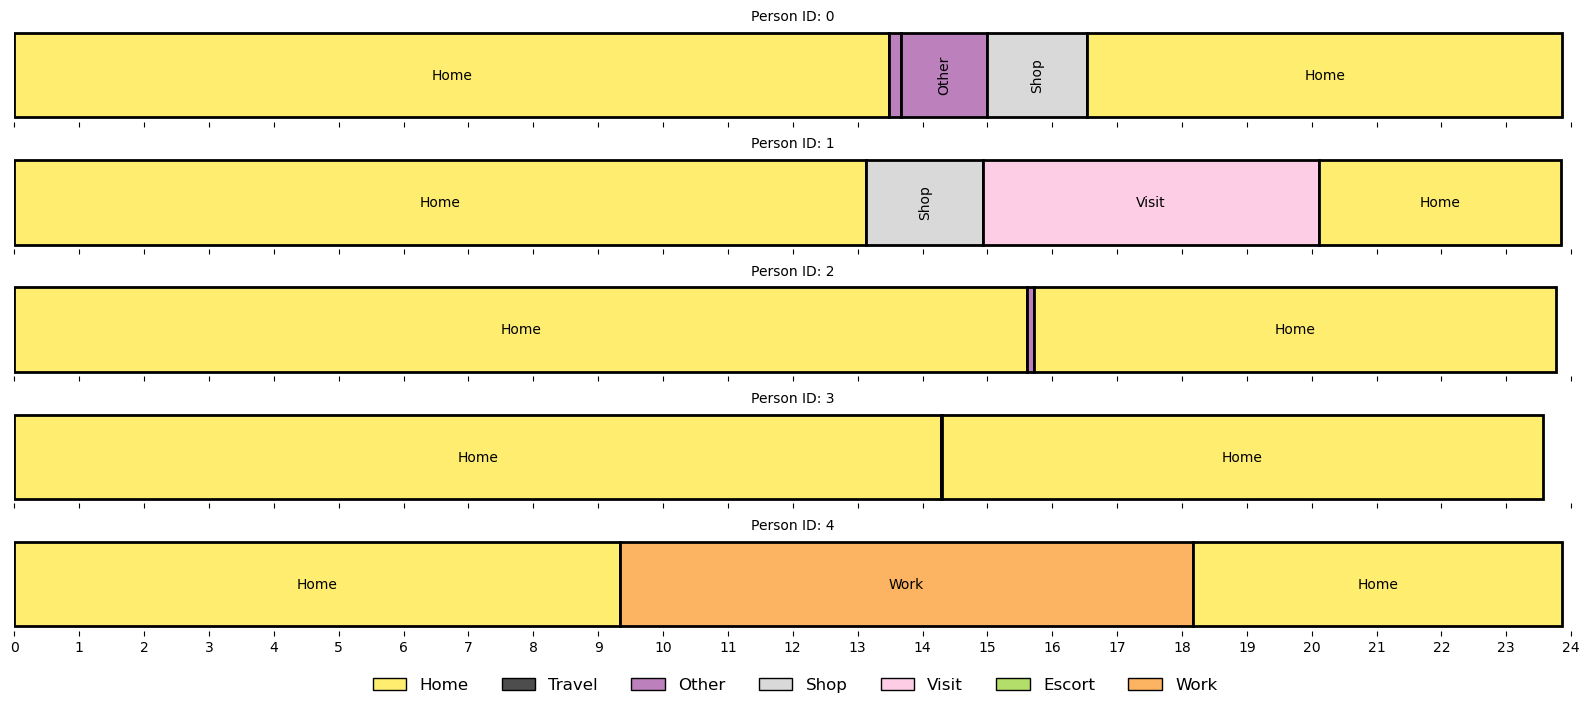

In [75]:
synthetics = DataFrame(
    [
        {
            "gender": "M",
            "age": 30,
            "income": 2,
            "area": "urban",
        },
    ]
    * 5
)

utils.plot(generate(synthetics))

In [76]:
synthetics = DataFrame(
    [
        {
            "gender": "F",
            "age": 20,
            "income": 1,
            "area": "rural",
        }
        for i in range(10_000)
    ]
)

population = generate(synthetics)
print("Done")

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Restoring states from the checkpoint path at C:\Users\fred\Projects\caveat\logs\gen-demo\5x128\version_0\checkpoints\epoch=33-step=25976.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at C:\Users\fred\Projects\caveat\logs\gen-demo\5x128\version_0\checkpoints\epoch=33-step=25976.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

generated 10000 schedules
Done


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at C:\Users\fred\Projects\caveat\logs\gen-demo\5x128\version_0\checkpoints\epoch=33-step=25976.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Loaded model weights from the checkpoint at C:\Users\fred\Projects\caveat\logs\gen-demo\5x128\version_0\checkpoints\epoch=33-step=25976.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

generated 3 schedules


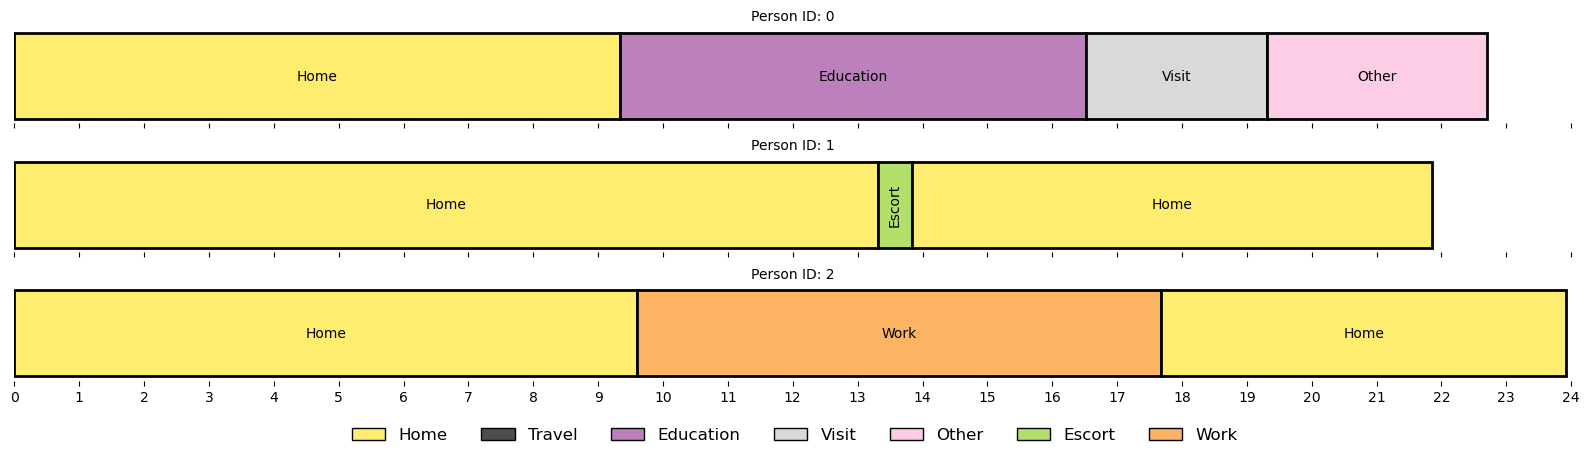

In [79]:
synthetics = DataFrame(
    [
        {
            "gender": "F",
            "age": 30,
            "income": 4,
            "area": "suburban",
        },
        {
            "gender": "F",
            "age": 30,
            "income": 4,
            "area": "suburban",
        },
        {
            "gender": "F",
            "age": 30,
            "income": 4,
            "area": "suburban",
        },
    ]
)
utils.plot(generate(synthetics))